In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
a = 2**(1/3)

x1 = 1/(2 - a)
x0 = -a*x1

b = 2**(1/5)
y1 = 1/(2 - b)
y0 = -b*y1

d1 = d3 = d7 = d9 = x1*y1
d2 = d8 = x0*y1
d4 = d6 = x1*y0
d5 = x0*y0
ds = (d1, d2, d3, d4, d5, d6, d7, d8, d9, None)
cs = (d1/2, *[(ds[i] + ds[i+1])/2 for i in range(8)], d9/2)

In [23]:
def dT_dp(p):
    return p

def dV_dq(q):
    return 2*np.cos(q)*np.sin(q)

def hamiltonian(q, p):
    return p**2/2 - np.cos(q)**2

In [32]:
z = [(0.5, 0)]
z_rk = [z[0]]
dt = 0.01
for i in range(2000):
    q, p = z[-1]
    for c, d in zip(cs, ds):
        qi = q + (dt*c*dT_dp(p) if c != None else 0)
        pi = p - (dt*d*dV_dq(q) if d != None else 0)
        q, p = qi, pi
    z.append((q, p))

    q, p = z_rk[-1]

    k1 = dT_dp(p)
    k2 = dT_dp(p + dt*k1/2)
    k3 = dT_dp(p + dt*k2/2)
    k4 = dT_dp(p + dt*k3)

    l1 = -dV_dq(q)
    l2 = -dV_dq(q + dt*l1/2)
    l3 = -dV_dq(q + dt*l2/2)
    l4 = -dV_dq(q + dt*l3)

    z_rk.append((
        q + dt*(k1 + 2*k2 + 2*k3 + k4)/6,
        p + dt*(l1 + 2*l2 + 2*l3 + l4)/6
    ))

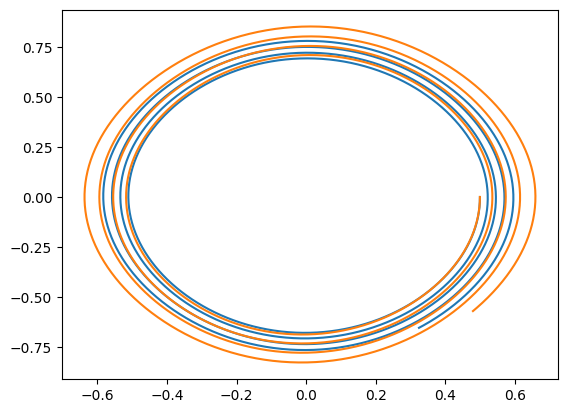

In [33]:
plt.plot(*np.transpose(z_rk))
plt.plot(*np.transpose(z))

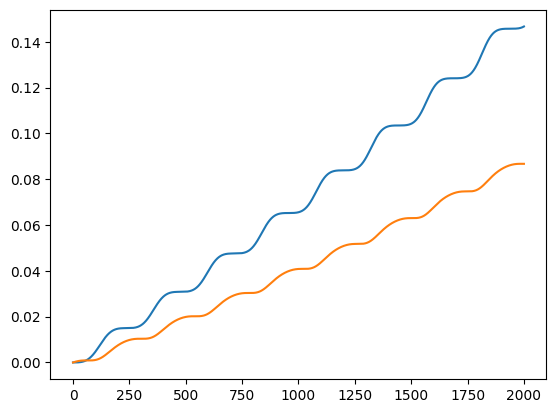

In [34]:
plt.plot([abs(hamiltonian(q, p) - hamiltonian(*z[0])) for q, p in z])
plt.plot([abs(hamiltonian(q, p) - hamiltonian(*z[0])) for q, p in z_rk])